In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_convert_to_annual_sets(filename):
    """ Loads dataframe and converts it to dictionary
    of dataframes.
    """
    df = pd.read_csv(filename)
    df["Median Rent"] = df["Median Rent"].str.replace(",", "").astype("float")
    
    _temp = df["Month"].str.split(" ", n = 1, expand = True)
    df["Year"] = _temp[1]
    df["Month"] = _temp[0]
    
    results = {}
    for key, group in df.groupby(by="Year", group_keys=True):
        results[key] = group[["Month", "Median Rent"]]
        
    return results

In [3]:
def compile_monthly_means(filename):
    """ Loads dataframe and compiles the mean for each month.
    """
    df = pd.read_csv(filename)
    df["Median Rent"] = df["Median Rent"].str.replace(",", "").astype("float")
    
    _temp = df["Month"].str.split(" ", n = 1, expand=True)
    df["Year"] = _temp[1].astype("int")
    df["Month"] = _temp[0]
    
    group = df.groupby(by="Month", group_keys=True)["Median Rent"]
    return group.mean().to_dict(), group.std().to_dict()

In [4]:
def plot_prices(filename, title="", show_mean_and_std=False):
    """Plots annual rents.
    """
    df_dicts = load_and_convert_to_annual_sets(filename)
    
    fig = plt.figure(figsize=(12., 5.0))
    ax = fig.gca()
    
    if title != "":
        ax.set_title(title, fontsize=14, fontweight="bold", color="darkgrey")
    for key, df in df_dicts.items():
        rents = df["Median Rent"].iloc[::-1].to_numpy()
        x = np.arange(rents.shape[0])
        ax.plot(x, rents, marker="o", markersize=5.0, lw=0.5, ls="-", label=key)
    ax.legend(loc="lower left")
    months = df_dicts["2021"]["Month"].tolist()
    months.reverse()
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels(months, fontsize=10, fontweight="bold", 
                       ha="left", va="top", color="darkgrey", rotation=-25)
    ax.set_ylabel("Month", fontsize=12, fontweight="bold", color="darkgrey")
    ax.set_ylabel("Rent $", fontsize=12, fontweight="bold", color="darkgrey")
    
    if show_mean_and_std:
        mean_dict, std_dict = compile_monthly_means(filename)
        mean = np.array([mean_dict[month] for month in months])
        std = np.array([std_dict[month] for month in months])
        ax.plot(np.arange(12), mean, lw=1.0, ls="--", marker="d", color="black", alpha=1.0)
        ax.fill_between(x=np.arange(12), y1=(mean - std), y2=(mean + std), color="steelblue",
                        alpha=0.25)
    
    ax.grid(ls="--", lw=0.5, color="darkgrey")
    ax.set_axisbelow(True)
    ax.set_ylim(0, )
    
    plt.show()

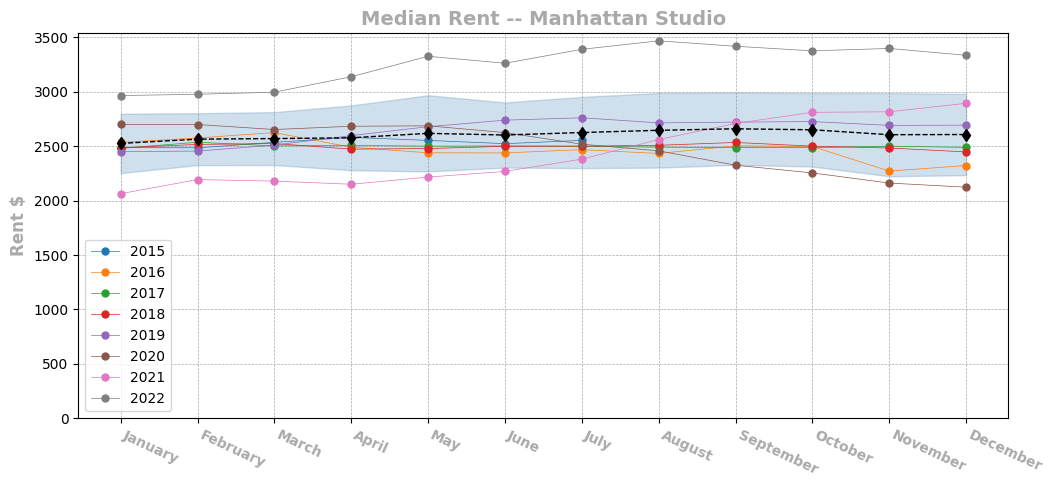

In [5]:
plot_prices(
    "manhattan_studio.csv", 
    title="Median Rent -- Manhattan Studio", 
    show_mean_and_std=True)

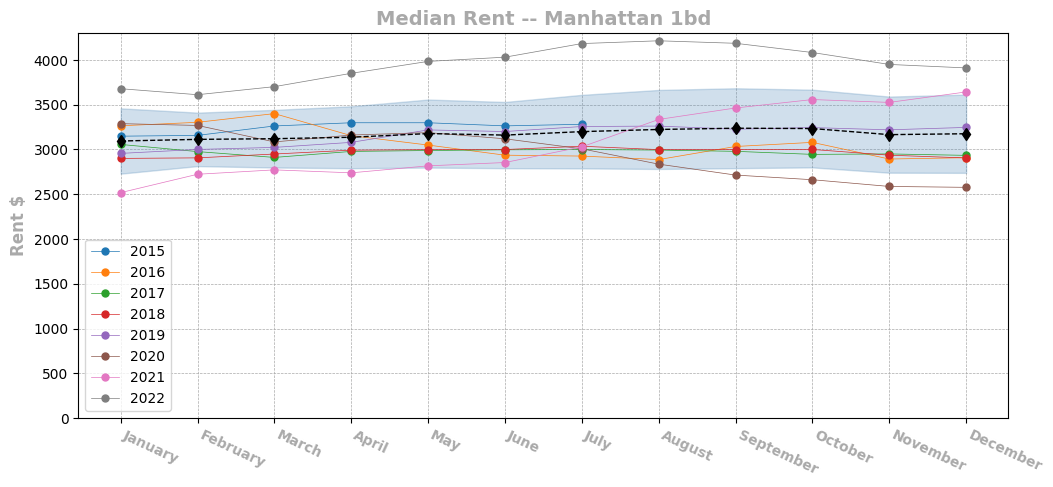

In [6]:
plot_prices(
    "manhattan_1bd.csv",
    title="Median Rent -- Manhattan 1bd", 
    show_mean_and_std=True)

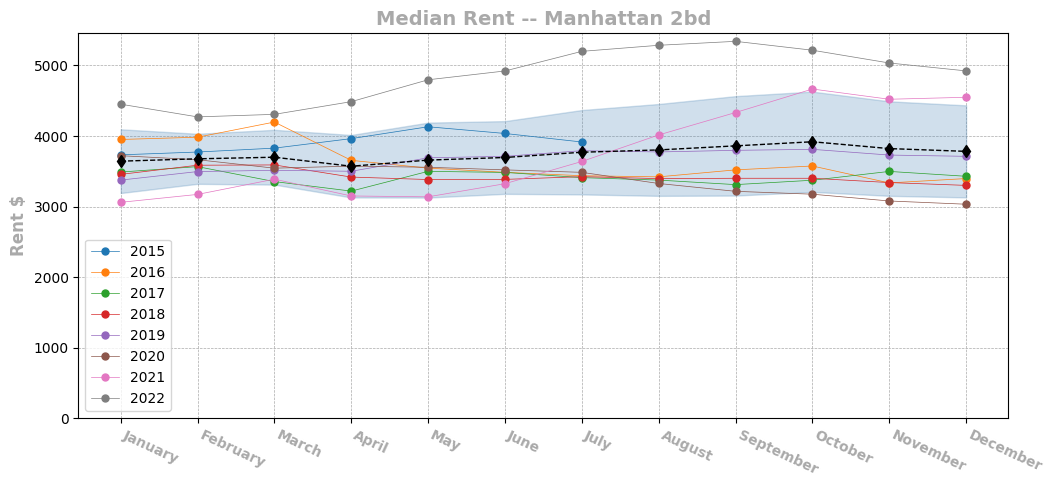

In [7]:
plot_prices(
    "manhattan_2bd.csv",
    title="Median Rent -- Manhattan 2bd", 
    show_mean_and_std=True)

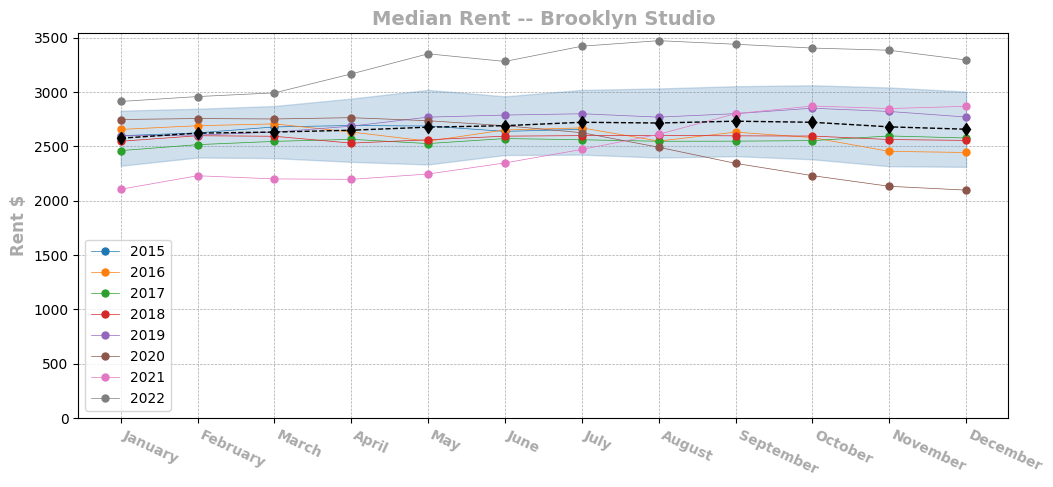

In [8]:
plot_prices(
    "brooklyn_studio.csv",
    title="Median Rent -- Brooklyn Studio", 
    show_mean_and_std=True)

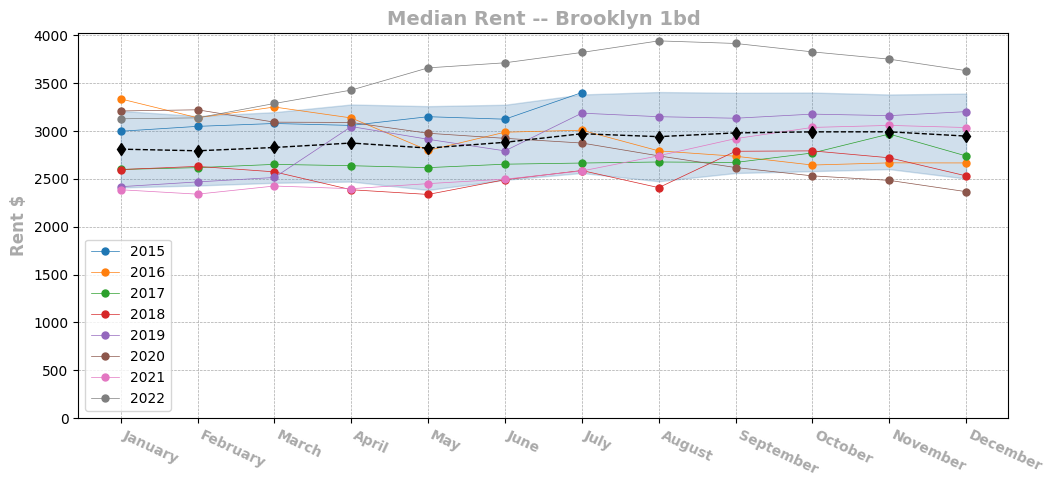

In [9]:
plot_prices(
    "brooklyn_1bd.csv", 
    title="Median Rent -- Brooklyn 1bd", 
    show_mean_and_std=True)